In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import warnings
import numpy as np

In [5]:
warnings.filterwarnings('ignore')

In [8]:
price = pd.read_csv("hose.csv")
hrcPrice = pd.read_csv("hrc.csv")
hpg = pd.read_excel("hpg.xlsx", engine='openpyxl')

In [9]:
price.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,VNAll-INDEX,20220304,1542.67,1552.25,1542.67,1547.16,740576000
1,AAA,20220304,18.60,18.75,18.30,18.40,4733200
2,AAM,20220304,13.15,13.25,12.70,13.25,58000
3,AAT,20220304,14.10,14.30,13.95,14.15,392000
4,ABR,20220304,20.10,21.10,20.10,21.10,3500


In [10]:
#Kiểm tra kiểu dữ liệu ở các cột
price.dtypes

<Ticker>         object
<DTYYYYMMDD>      int64
<Open>          float64
<High>          float64
<Low>           float64
<Close>         float64
<Volume>          int64
dtype: object

In [11]:
#Kiểm tra NaN data
price.isna().sum()

<Ticker>        0
<DTYYYYMMDD>    0
<Open>          0
<High>          0
<Low>           0
<Close>         0
<Volume>        0
dtype: int64

In [12]:
#Sửa tên cột và định đạng dữ liệu cột Date
price.columns = price.columns.str.replace('[<>]','')
price.rename(columns={"DTYYYYMMDD": "Date"}, inplace=True)
price['Date'] = pd.to_datetime(price['Date'], format='%Y%m%d')
price

,Ticker,Date,Open,High,Low,Close,Volume
0,VNAll-INDEX,2022-03-04,1542.6700,1552.2500,1542.6700,1547.1600,740576000
1,AAA,2022-03-04,18.6000,18.7500,18.3000,18.4000,4733200
2,AAM,2022-03-04,13.1500,13.2500,12.7000,13.2500,58000
3,AAT,2022-03-04,14.1000,14.3000,13.9500,14.1500,392000
4,ABR,2022-03-04,20.1000,21.1000,20.1000,21.1000,3500
...,...,...,...,...,...,...,...
956792,SAM,2000-08-02,2.1788,2.1788,2.1788,2.1803,200
956793,REE,2000-07-31,1.6023,1.6023,1.6023,1.6032,300
956794,SAM,2000-07-31,2.1414,2.1414,2.1414,2.1429,10000
956795,REE,2000-07-28,1.5728,1.5728,1.5728,1.5737,1000


In [13]:
#Thay đổi index và columns
index = price.pivot(index='Date', columns='Ticker', values='Close')
index.tail()

Ticker,AAA,AAM,AAT,ABR,ABS,ABT,ACB,ACC,ACL,ADG,...,VRC,VRE,VSC,VSH,VSI,VTB,VTF,VTO,YBM,YEG
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,17.65,12.55,13.60,NaN,24.35,38.4,33.90,22.0,19.80,51.3,...,35.8,33.50,42.30,28.50,23.50,11.95,NaN,13.25,9.73,27.2
2022-03-01,18.00,12.40,13.55,NaN,24.30,38.4,33.85,23.5,21.15,51.1,...,34.0,33.50,41.95,28.50,22.35,11.95,NaN,13.45,10.10,29.1
2022-03-02,17.65,12.60,13.55,NaN,24.50,38.5,32.90,24.5,22.10,50.8,...,35.0,32.80,41.50,28.60,21.60,11.95,NaN,13.50,9.96,29.8
2022-03-03,18.50,13.15,14.05,NaN,25.20,39.2,33.45,23.0,22.10,50.6,...,33.0,32.70,44.40,28.65,22.90,11.95,NaN,14.40,10.65,31.0
2022-03-04,18.40,13.25,14.15,21.1,25.35,41.9,34.30,23.5,22.00,51.3,...,31.2,33.75,44.50,28.50,23.00,11.80,NaN,14.50,10.60,30.8


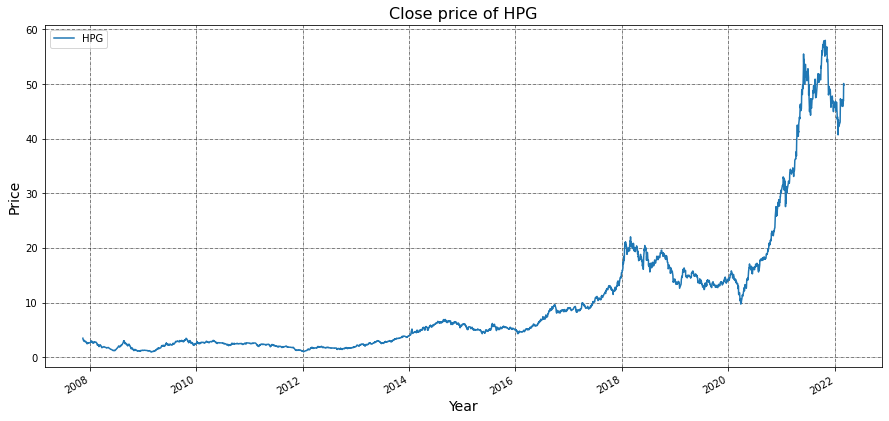

In [14]:
#Phân tích cổ phiếu Hòa Phát 

index['HPG'].fillna(method='ffill').plot(legend = True, figsize=(15,7))

plt.title('Close price of HPG', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [15]:
#Chỉ số cơ bản
hpg.head()

,Kết quả kinh doanh,2018,2019,2020,2021
0,Doanh thu thuần,55836458380,63658192674,9.011850e+10,149679789979
1,Giá vốn hàng bán,44165626149,52472820452,7.121445e+10,108571380446
2,Lợi nhuận gộp,11670832231,11185372222,1.890405e+10,41108409533
3,Doanh thu hoạt động tài chính,294408271,471053832,1.004790e+09,3071440640
4,Chi phí tài chính,772317162,1181675711,2.837406e+09,3731542258


In [16]:
hpg.fillna(value=0, inplace=True)
hpg.isna().sum()
hpg = hpg.set_index('Kết quả kinh doanh').T
hpg.columns.name = None

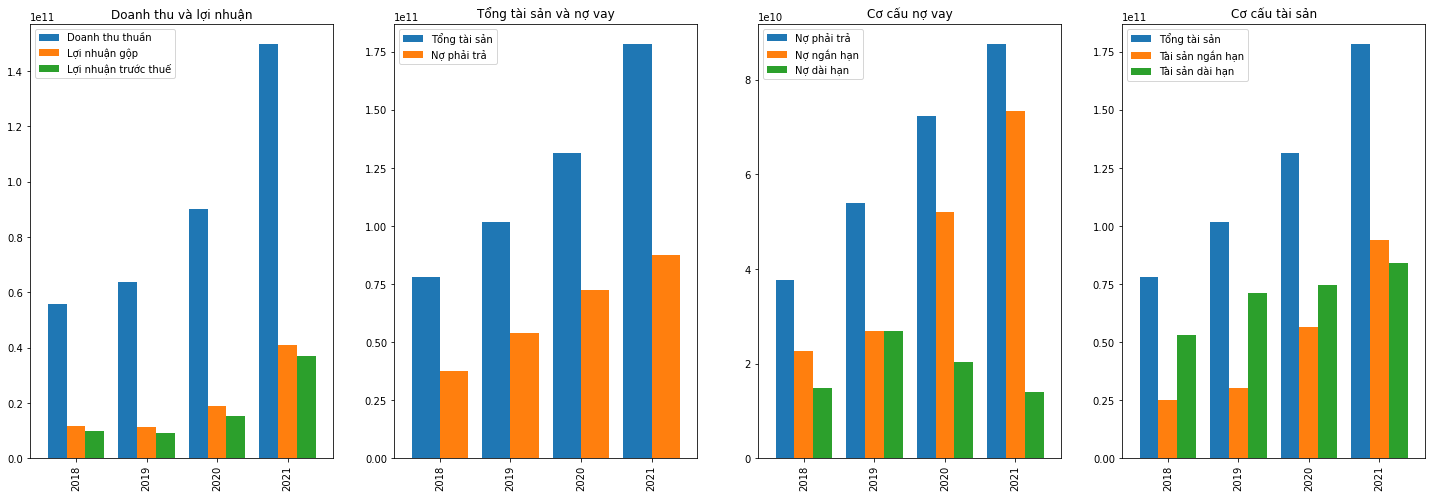

In [17]:
fig, axarr = plt.subplots(1, 4, figsize=(25, 8))

#Doanh thu và lợi nhuận
chart1 = hpg[['Doanh thu thuần', 'Lợi nhuận gộp', 'Lợi nhuận trước thuế']]
chart1.plot.bar(ax=axarr[0], width=0.8, title='Doanh thu và lợi nhuận')

#Tổng tài sản và nợ
chart2 = hpg[['Tổng tài sản', 'Nợ phải trả']]
chart2.plot.bar(ax=axarr[1], width=0.8, title='Tổng tài sản và nợ vay')

#Cơ cấu nợ vay
chart3 = hpg[['Nợ phải trả', 'Nợ ngắn hạn', 'Nợ dài hạn']]
chart3.plot.bar(ax=axarr[2], width=0.8, title='Cơ cấu nợ vay')

#Cơ cấu tài sản
chart4 = hpg[['Tổng tài sản', 'Tài sản ngắn hạn', 'Tài sản dài hạn']]
chart4.plot.bar(ax=axarr[3], width=0.8, title='Cơ cấu tài sản')

plt.legend()
plt.show()

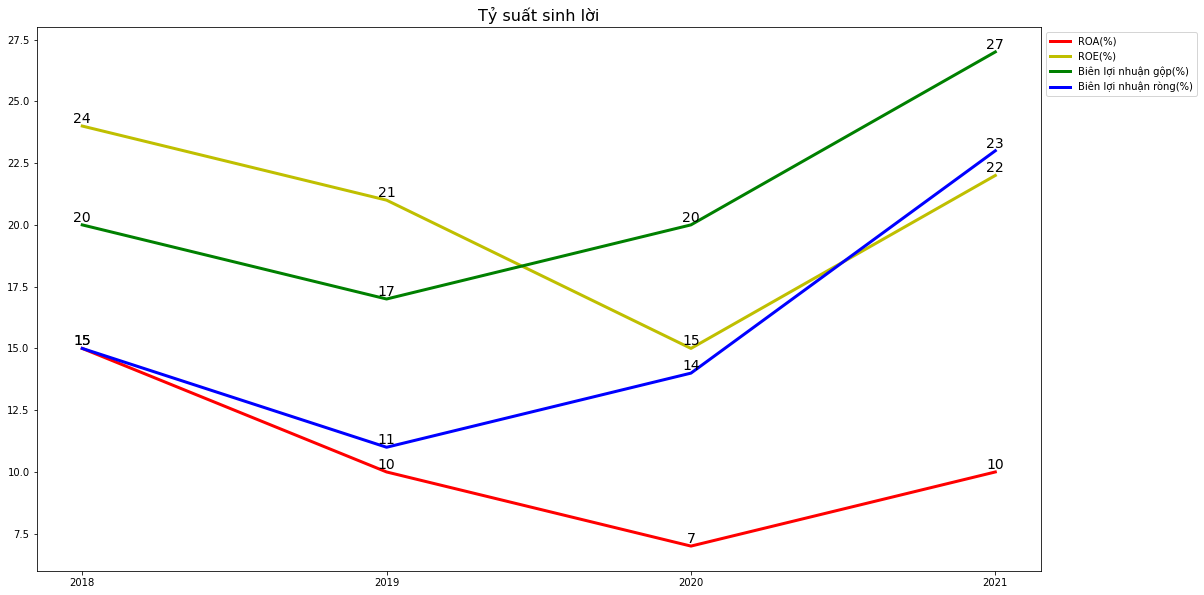

In [18]:
cols = ['ROA(%)', 'ROE(%)', 'Biên lợi nhuận gộp(%)', 'Biên lợi nhuận ròng(%)']
x_axes = hpg.index

hpg[cols] = hpg[cols].astype(float)
hpg[cols] = hpg[cols].applymap(np.int64)

def plot_text(x, y):
  for a, b in zip(x, y):
    plt.text(a, b, str(b), fontsize=14, ha='center', va='bottom')

plt.figure(figsize=(18,10))

plt.plot(x_axes, hpg['ROA(%)'], color='r', linewidth=3, label='ROA(%)')
plot_text(x_axes, hpg['ROA(%)'])
plt.plot(x_axes, hpg['ROE(%)'], color='y', linewidth=3, label='ROE(%)')
plot_text(x_axes, hpg['ROE(%)'])
plt.plot(x_axes, hpg['Biên lợi nhuận gộp(%)'], color='g', linewidth=3, label='Biên lợi nhuận gộp(%)')
plot_text(x_axes, hpg['Biên lợi nhuận gộp(%)'])
plt.plot(x_axes, hpg['Biên lợi nhuận ròng(%)'], color='blue', linewidth=3, label='Biên lợi nhuận ròng(%)')
plot_text(x_axes, hpg['Biên lợi nhuận ròng(%)'])

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

plt.title("Tỷ suất sinh lời", fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [19]:
#So sánh giá cổ phiếu HPG và giá thép HRC (2017-2022)
hrcPrice.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,06/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00",-,0.00%
1,07/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00",-,0.00%
2,08/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00",-,0.00%
3,09/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00",-,0.00%
4,10/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00",-,0.00%


In [20]:
#Sửa tên các cột
new_names = {
    'Ngày': 'Date',
    'Lần cuối': 'Close',
    'Mở': 'Open',
    'Cao': 'High',
    'Thấp': 'Low'
}

hrcPrice.rename(columns=new_names, inplace=True)
hrcPrice.drop(['KL', '% Thay đổi'], inplace=True, axis=1)

hrcPrice.head()

,Date,Close,Open,High,Low
0,06/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00"
1,07/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00"
2,08/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00"
3,09/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00"
4,10/03/2017,"3,870.00","3,870.00","3,870.00","3,870.00"


In [21]:
#Chuyển giá trị cột Close về định dạng int
hrcPrice['Close'] = hrcPrice['Close'].str.replace(',', '')
hrcPrice['Close'] = hrcPrice['Close'].str.extract(r'^(\d{4})', expand=False)
hrcPrice['Close'] = pd.to_numeric(hrcPrice['Close'])

#Định dạng dữ liệu Date
hrcPrice['Date'] = pd.to_datetime(hrcPrice['Date'], format='%d/%m/%Y')

In [22]:
hrcPrice.dtypes

Date     datetime64[ns]
Close             int64
Open             object
High             object
Low              object
dtype: object

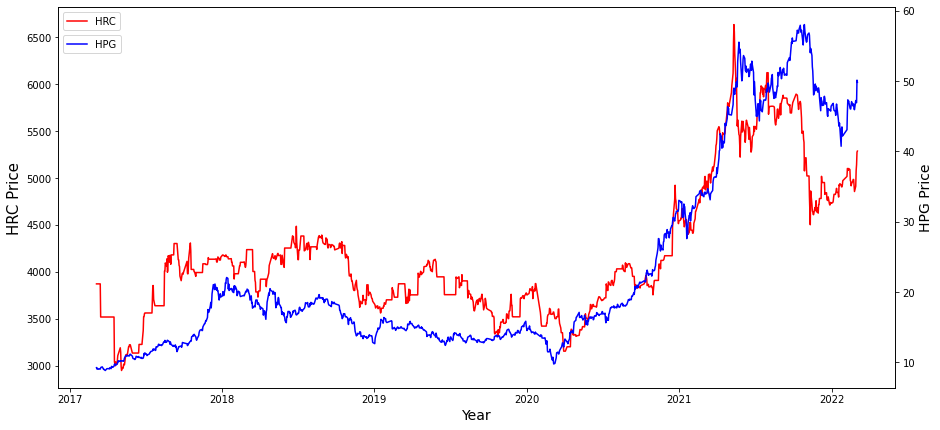

In [23]:
hpg_index = index[ : 4024: -1].sort_index()

x = hrcPrice['Date']
y1 = hrcPrice['Close']
y2 = hpg_index['HPG'].fillna(method='ffill')

fig, ax = plt.subplots(figsize=(15,7))

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("HRC Price", fontsize=15)
ax.plot(x, y1, color='red', label='HRC')
ax.legend(loc="upper left")

ax2 = ax.twinx()

ax2.set_ylabel('HPG Price', fontsize=14)
ax2.plot(x, y2, color='blue', label='HPG')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.94))

plt.show()

### Giá thép HRC (sản phẩm đầu ra của Hoà Phát) và giá cổ phiếu HPG luôn cùng pha nhau nhưng giá HPG thường biến động trễ hơn so với giá HRC

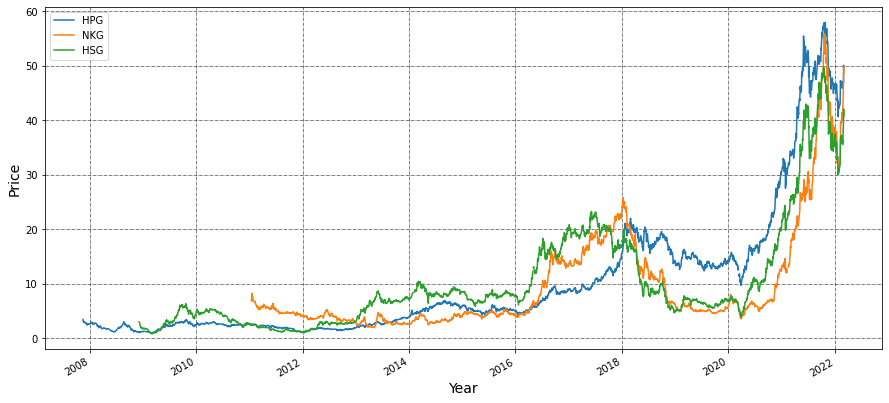

In [24]:
#So sánh với các cổ phiếu cùng ngành

index['HPG'].plot(legend = True, figsize=(15,7))
index['NKG'].plot(legend = True)
index['HSG'].plot(legend = True)

plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### So với các doanh nghiệp cùng ngành trong các nhịp tăng, giá cổ phiếu Hoà Phát có mức tăng trưởng kém hơn so với Nam Kim và Hoa Sen nhưng ở các nhịp giảm thì có mực giảm ít nhất

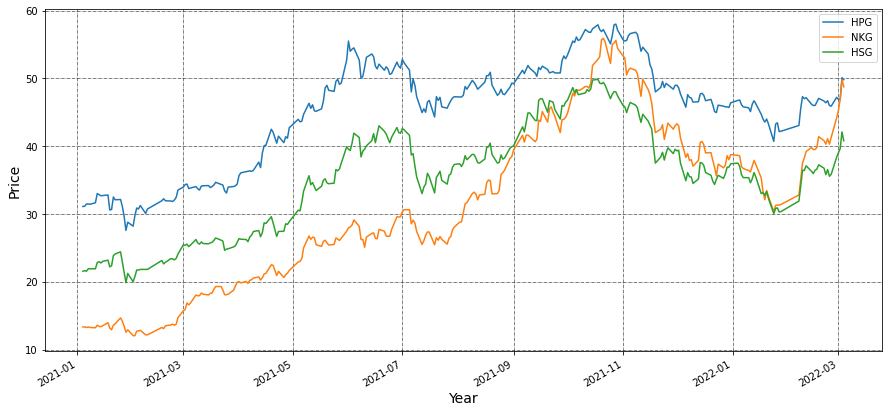

In [26]:
#2021-2022
sub_index = index['2021-01-01':]

sub_index['HPG'].plot(legend = True, figsize=(15,7))
sub_index['NKG'].fillna(method='ffill').plot(legend = True)
sub_index['HSG'].fillna(method='ffill').plot(legend = True)

plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

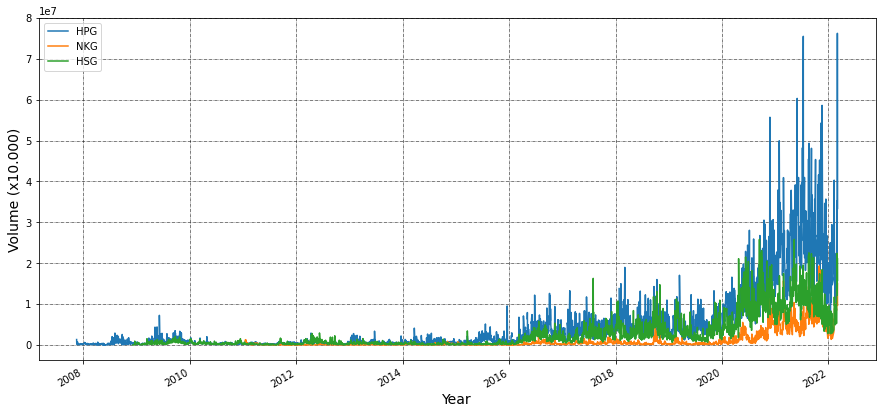

In [27]:
#So sánh khối lượng giao dịch theo thời gian

volume = price.pivot(index='Date', columns='Ticker', values='Volume')

volume['HPG'].plot(legend = True, figsize=(15,7))
volume['NKG'].plot(legend = True)
volume['HSG'].plot(legend = True)

plt.ylabel('Volume (x10.000)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Bởi vì khối lượng cổ phiếu đang lưu hành của HPG rất lớn nên khối lượng giao dịch của cổ phiếu Hoà Phát đều cao nhất trong ngành, có thời gian gấp hơn 3 lần khối lượng giao dịch của Nam Kim và Hoa Sen. Đây cũng là một phần lí do khiến cho giá HPG không có mức tăng trưởng mạnh mẽ như NKG, HSG vì khối lượng cổ phiếu bên ngoài quá nhiều

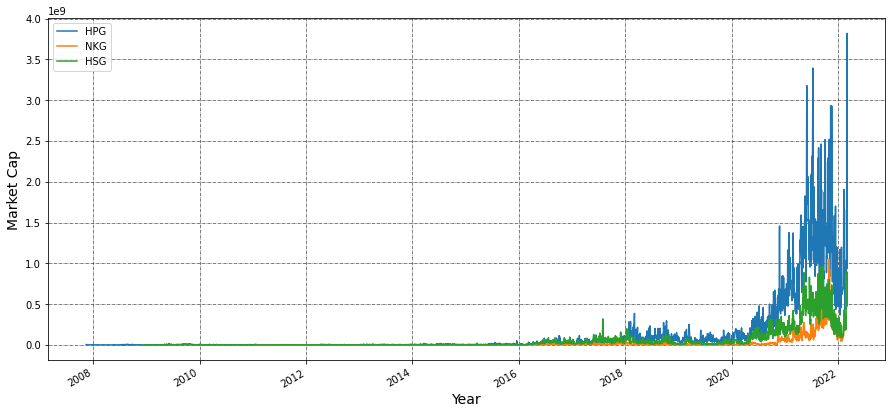

In [28]:
#So sánh giá trị giao trị theo thời gian

price['MarktCap'] = price['Close']*price['Volume']
MarktCap = price.pivot(index='Date', columns='Ticker', values='MarktCap')

MarktCap['HPG'].plot(legend = True, figsize=(15,7))
MarktCap['NKG'].plot(legend = True)
MarktCap['HSG'].plot(legend = True)

plt.ylabel('Market Cap', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

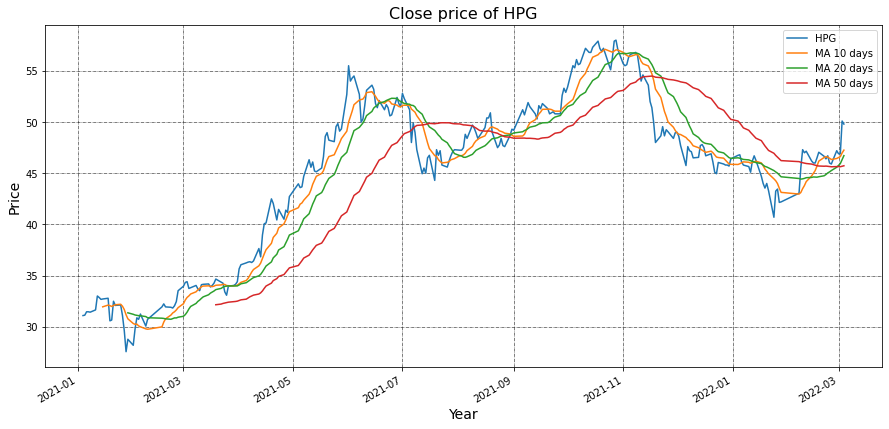

In [29]:
#Sử dụng đường trung bình xác định xu hướng giá cổ phiếu
sub_index = index['2021-01-01':'2022-03-04']

sub_index['MA 10 days'] = sub_index['HPG'].rolling(10).mean()
sub_index['MA 20 days'] = sub_index['HPG'].rolling(20).mean()
sub_index['MA 50 days'] = sub_index['HPG'].rolling(50).mean()

sub_index['HPG'].plot(legend = True, figsize=(15,7))
sub_index['MA 10 days'].plot(legend = True)
sub_index['MA 20 days'].plot(legend = True)
sub_index['MA 50 days'].plot(legend = True)

plt.title('Close price of HPG', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Sau khi đường MA 10 vượt MA 20 và đường MA 20 vượt MA 50 giá cổ phiếu đã có một nhịp tăng ngắn hạn, hiện tại giá đang gặp kháng cự ở vùng giá 50